In [56]:
%matplotlib inline
from utils import data_path
from _region.shapes import ConvexPolygon
import matplotlib.pyplot as plt
import jax.numpy as np
import numpy as onp

In [57]:
total_vertices = np.asarray(
    [
        [-1, 0],
        [-0.2, 0],
        [0.2, 0],
        [1, 0],
        [1, 1],
        [0.7, 1],
        [0.3, 1],
        [-1, 1],
    ]
)

region_idx = np.asarray([[1, 2, 5, 6], [2, 3, 4, 5], [0, 1, 6, 7]])

regions_verts = total_vertices[region_idx]

In [58]:
Regions = [ConvexPolygon(verts) for verts in regions_verts]

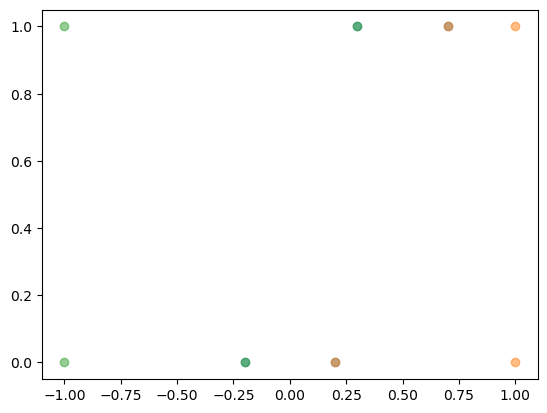

In [59]:
for region in Regions:
    v = region.vertices
    plt.scatter(v[:, 0], v[:, 1], alpha=0.5)

In [60]:
N = 2000
N_b = 200

x_min, t_min = np.min(total_vertices, axis=0)
x_max, t_max = np.max(total_vertices, axis=0)

In [61]:
x_interior = onp.random.uniform(x_min, x_max, size=N)
t_interior = onp.random.uniform(t_min, t_max, size=N)
XT = np.vstack([x_interior, t_interior]).T

x_bound = onp.random.uniform(x_min, x_max, size=N_b)
t_bound = np.zeros(N_b)
XT_bound = np.vstack([x_bound, t_bound]).T

In [62]:
main_args = {i: {} for i in range(len(Regions))}

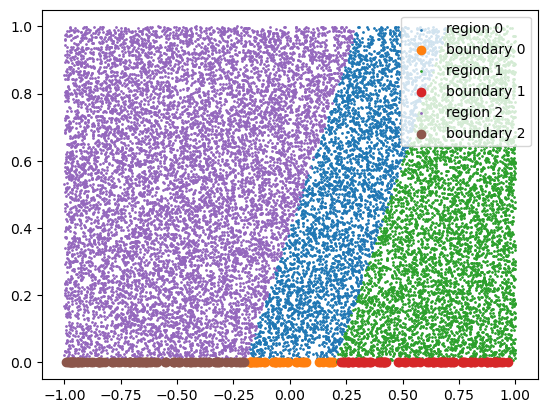

In [65]:
for i, region in enumerate(Regions):
    args_i = main_args[i]
    interior_idxs = region.are_inside(XT)
    valid_interior = XT[interior_idxs]
    args_i["interior"] = valid_interior
    plt.scatter(valid_interior[:, 0], valid_interior[:, 1], label=f"region {i}", s=1)

    bound_idxs = region.are_inside(XT_bound)
    valid_bound = XT_bound[bound_idxs]
    args_i["boundary"] = valid_bound
    plt.scatter(valid_bound[:, 0], valid_bound[:, 1], label=f"boundary {i}")
plt.legend()